## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №1

Задание выполнил(а): Подчезерцев Алексей

### Общая информация

__Дата выдачи:__ 03.02.2019

__Дедлайн:__ 23:59 12.02.2019

### О задании

В данном домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача $p_i$ оценивается в 1 балл; Оценка за ДЗ = $\frac{10}{24}\sum_{i}p_i $

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_01_Фамилия_Имя.ipynb

## Часть 1. Numpy

In [1]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.42, вес контрольной - 0.14, вес самостоятельных - 0.14. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [2]:
def result_mark(weights, marks):
    return (weights * marks).sum().round().astype(int)

In [3]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 10, 8, 6])
result_mark(weights, marks)

8

### 2

Напишите функцию, меняющую все каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [4]:
def change_array(array, number):
    array[::3] = number
    return array

In [5]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111
change_array(array, number)

array([-111,    5,    1, -111,   -3,   22, -111])

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (_**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**_).

In [6]:
def find_close(array1, array2, precision):
    return np.arange(array1.size)[abs(array1 - array2) <= precision]

In [7]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4, 3, 0, -1.2])
precision = 0.5
find_close(array1, array2, precision)

array([0, 1, 3, 6])

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [8]:
def block_matrix(block):
    block = np.concatenate([block, block])
    return np.hstack([block, block])

In [9]:
block = np.array([[0, 1, 2], [3, 4, 5]])
block_matrix(block)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

In [10]:
def diag_prod(matrix):
    diag = matrix.diagonal()
    return diag[diag != 0].prod()

In [11]:
matrix = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
diag_prod(matrix)

32

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [12]:
def normalize(matrix):
    dividend = matrix - np.mean(matrix,axis=0)
    divider = np.std(matrix, axis = 0)
    return np.divide(dividend, divider, out=np.zeros(matrix.shape), where=divider!=0)

In [13]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
normalize(matrix)

array([[ 0.70710678, -0.39223227,  0.46291005],
       [-1.41421356,  1.37281295,  0.9258201 ],
       [ 0.70710678, -0.98058068, -1.38873015]])

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите ваше любимое число). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [14]:
def antiderivative(coefs):
    return np.polyint(coefs)

In [15]:
coefs = np.array([4, 6, 0, 1])
antiderivative(coefs)

array([1., 2., 0., 1., 0.])

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [16]:
def make_symmetric(matrix):
    sub = matrix.transpose()
    return np.tril(sub, -1) + matrix

In [17]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])
make_symmetric(matrix)

array([[ 1,  2,  3,  4],
       [ 2,  5,  6,  7],
       [ 3,  6,  8,  9],
       [ 4,  7,  9, 10]])

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [18]:
def construct_matrix(m, a, b):
    sub = np.zeros((m, b - a + 1), np.int32)
    return np.arange(a, b + 1) + sub

In [19]:
m = 5
a = 3
b = 10
construct_matrix(m, a, b)

array([[ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  5,  6,  7,  8,  9, 10]])

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [20]:
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2)/(np.linalg.norm(vec2)*np.linalg.norm(vec1))

In [21]:
vec1 = np.array([-2, 1, 0, -5, 4, 3, -3])
vec2 = np.array([0, 2, -2, 10, 6, 0, 0])
cosine_similarity(vec1, vec2)

-0.25

## Часть 2. Pandas и Matplotlib

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [23]:
data = pd.read_csv('data.csv', delimiter=',')
data.shape

(891, 12)

891 записей и 12 признаков

In [24]:
pd.concat([data.head(5), data.tail(5)])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

- PassengerId - другое
- Survived - Бинарный
- Pclass - Порядковый
- Name - другое
- Sex - Бинарный
- Age - вещественный
- SibSp - вещественный
- Parch - вещественный
- Ticket - другое
- Fare - вещественный
- Cabin - категориальный (возможна корреляция между номером кабины и статусом выжившего)
- Embarked - категориальный

Задача регрессии - определение стоимости тарифа (Fare)

Задача классификации - определение, выжил пассажир или нет по входным параметрам

Задача кластеризации - группировка пассажиров по возрастным категориям в зависимости от статуса выжившего, тарифа и др. параметров

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [25]:
data["Survived"].mean()

0.3838383838383838

In [26]:
survived = data[data["Survived"] == 1]
sex_filter = survived["Sex"] == "male"
survived[sex_filter].shape[0] / survived.shape[0], survived[~sex_filter].shape[0] / survived.shape[0]

(0.31871345029239767, 0.6812865497076024)

### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [27]:
data_pass_per_class = data.groupby("Pclass")["Pclass"].describe()["count"]
data_pass_per_class

Pclass
1    216.0
2    184.0
3    491.0
Name: count, dtype: float64

In [28]:
data[data["Pclass"] == data_pass_per_class[data_pass_per_class == data_pass_per_class.max()].index[0]]["Sex"].max()

'male'

### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [29]:
data["Fare"].describe()[["min", "mean", "max"]]

min       0.000000
mean     32.204208
max     512.329200
Name: Fare, dtype: float64

In [30]:
data[data["Embarked"] == "S"]["Fare"].describe()[["min", "mean", "max"]]

min       0.000000
mean     27.079812
max     263.000000
Name: Fare, dtype: float64

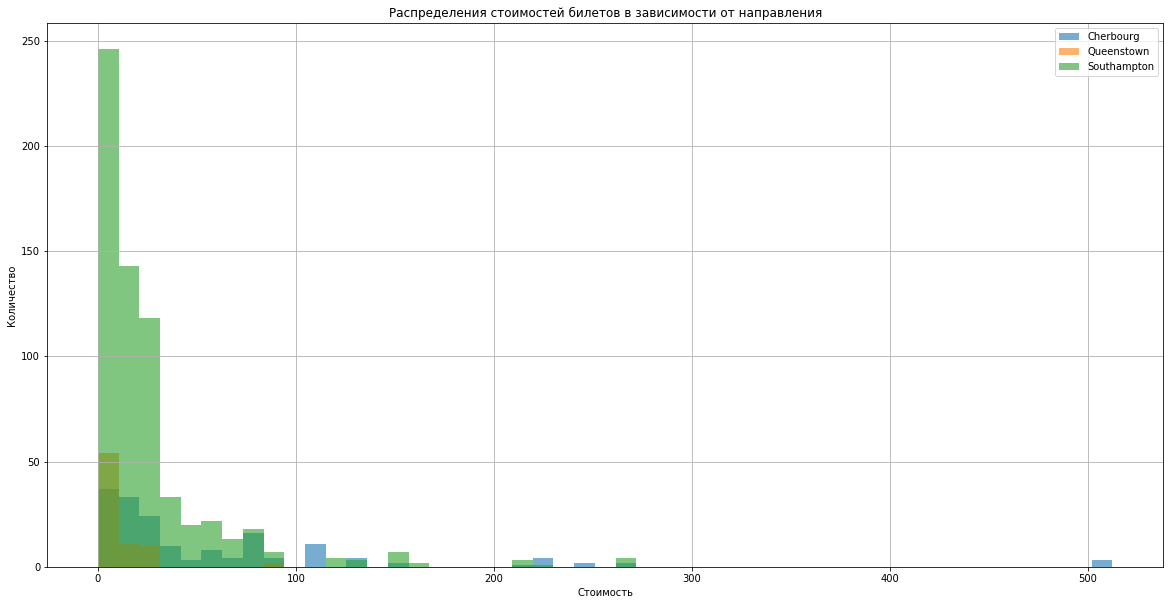

In [31]:
bins = np.linspace(0, data["Fare"].max(), 50)
alpha=0.6
plt.figure(figsize=(20,10))
plt.grid(True)
plt.title('Распределения стоимостей билетов в зависимости от направления')
plt.hist(data[data["Embarked"] == "C"]["Fare"], bins, alpha=alpha)
plt.hist(data[data["Embarked"] == "Q"]["Fare"], bins, alpha=alpha)
plt.hist(data[data["Embarked"] == "S"]["Fare"], bins, alpha=alpha)
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.legend(['Cherbourg', 'Queenstown', 'Southampton'])
plt.show()

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

Номер билета не несут полезную информацию. Pandas сам нумерует записи, идентификатор в данном случае так же не нужен

In [32]:
data = data.drop(columns=['Ticket', 'PassengerId'])
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [33]:
data.isnull().sum(axis=0)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [34]:
data["Age"].fillna(data["Age"].mean(), inplace=True)
data["Cabin"].fillna('Unknown', inplace=True)
data["Embarked"].fillna('S', inplace=True)
data.isnull().sum(axis=0)

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

In [35]:
data["Age"].corr(data["Fare"])

0.09156609328505758

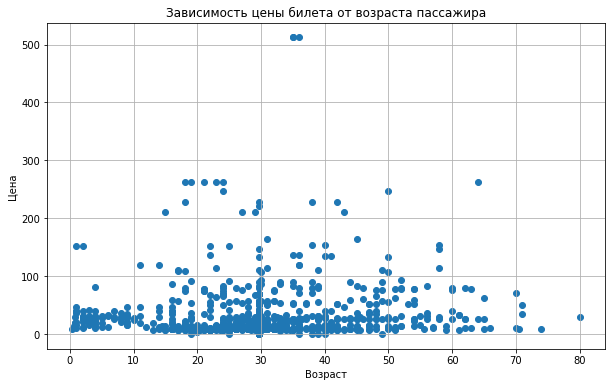

In [38]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.title('Зависимость цены билета от возраста пассажира')
plt.xlabel('Возраст')
plt.ylabel('Цена')
plt.scatter(data["Age"], data["Fare"])
plt.show()

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [39]:
data["Survived"].corr(data["Fare"])

0.25730652238496227

In [40]:
data[data["Survived"] == 1]["Fare"].mean()

48.39540760233917

In [41]:
data[data["Survived"] == 0]["Fare"].mean()

22.117886885245877

Чаще выживали пассажиры с дорогими билетами

In [42]:
data["Survived"].corr(data["Pclass"])

-0.33848103596101475

In [43]:
data.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [44]:
data[data["Survived"] == 1].groupby("Pclass").count()

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Pclass,,,,,,,,,
1,136,136,136,136,136,136,136,136,136
2,87,87,87,87,87,87,87,87,87
3,119,119,119,119,119,119,119,119,119


In [45]:
data[data["Survived"] == 0].groupby("Pclass").count()

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Pclass,,,,,,,,,
1,80,80,80,80,80,80,80,80,80
2,97,97,97,97,97,97,97,97,97
3,372,372,372,372,372,372,372,372,372


Зависимость выживаемости от класса так же присутствует. Больше людей, в процентном и количественном отношении, выжило в 1 классе

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [46]:
data['Relatives'] = 1 + data['SibSp'] +  data['Parch']
# Стоимость километра пути. Дистанция из Википедии
data.loc[data["Embarked"] == "S", "PricePerKm"] = data["Fare"] / 5867 
data.loc[data["Embarked"] == "C", "PricePerKm"] = data["Fare"] / 5720 
data.loc[data["Embarked"] == "Q", "PricePerKm"] = data["Fare"] / 5147 
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Relatives,PricePerKm
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Unknown,S,2,0.001236
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,2,0.012462
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Unknown,S,1,0.001351
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2,0.009051
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Unknown,S,1,0.001372


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [47]:
data["Name"].str.split(",").str.get(0).describe()["top"]

'Andersson'

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

In [48]:
def custom_hist(data, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(data, data.max().astype(int) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

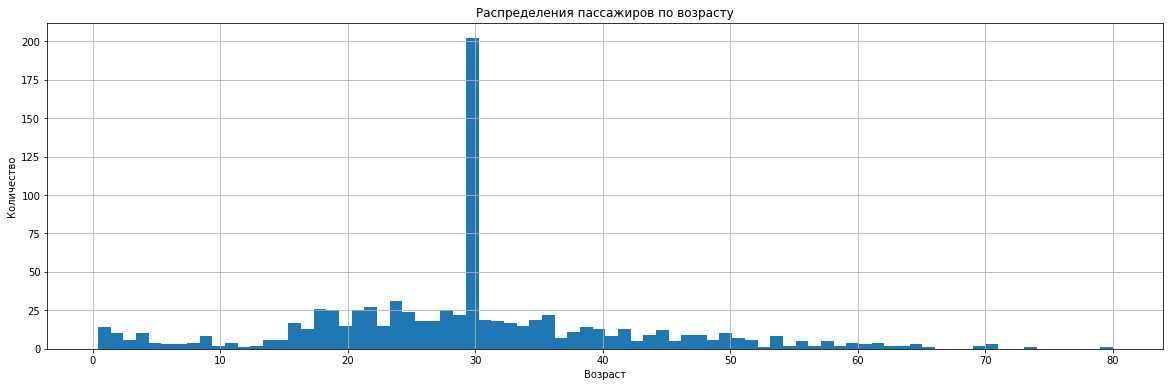

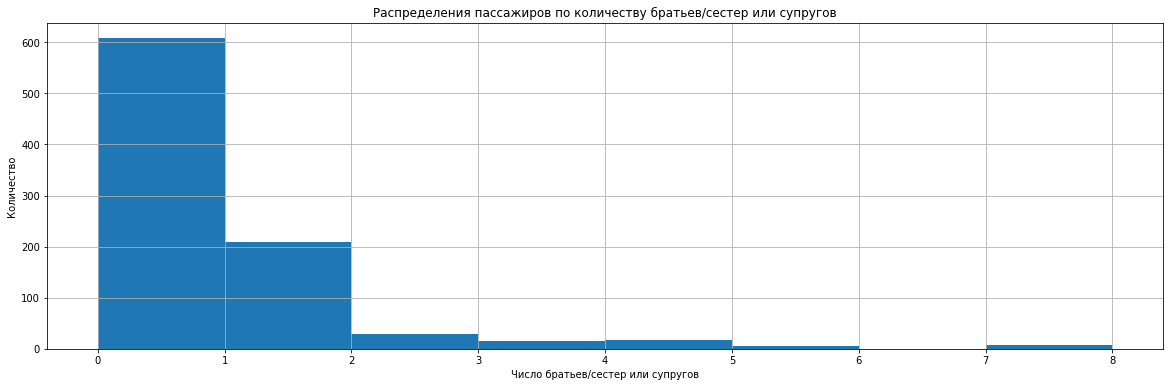

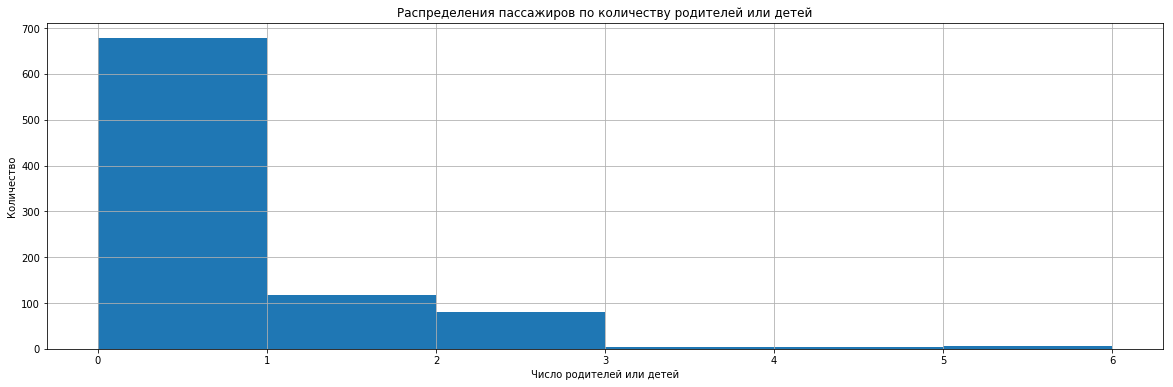

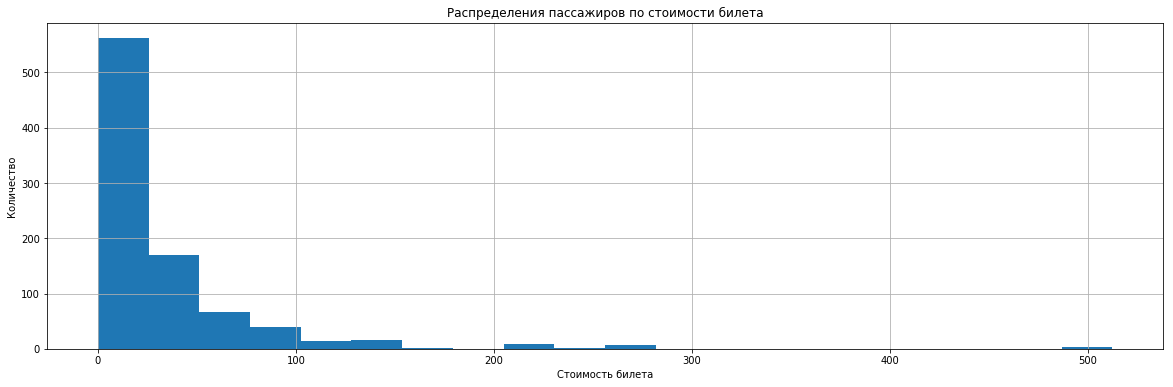

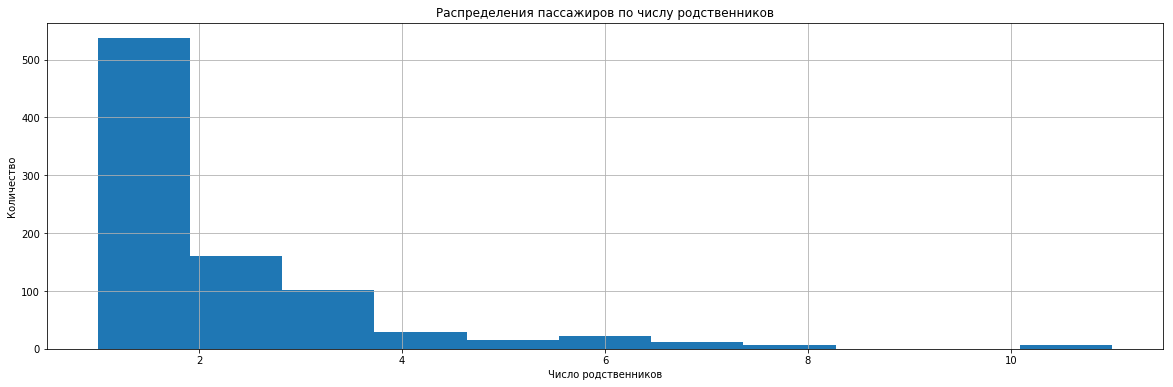

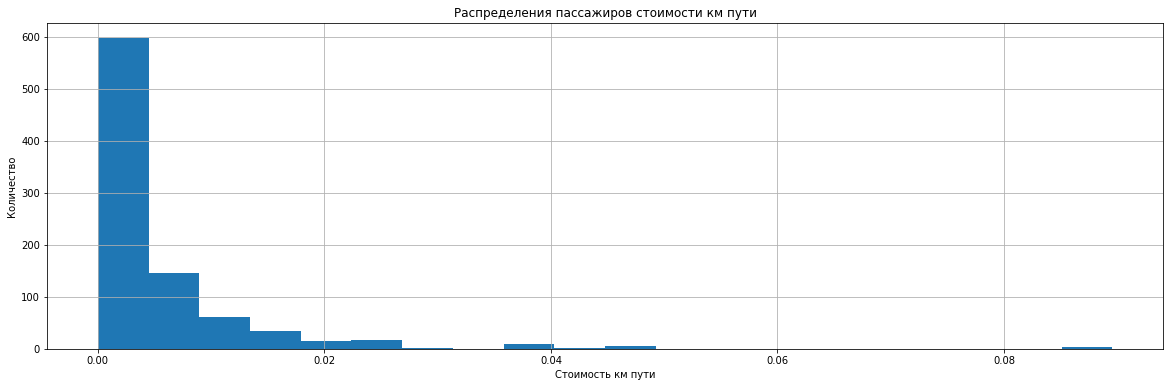

In [49]:
custom_hist(data["Age"], 'Распределения пассажиров по возрасту', 'Возраст')
custom_hist(data["SibSp"], 'Распределения пассажиров по количеству братьев/сестер или супругов', 'Число братьев/сестер или супругов')
custom_hist(data["Parch"], 'Распределения пассажиров по количеству родителей или детей', 'Число родителей или детей')
custom_hist(data["Fare"], 'Распределения пассажиров по стоимости билета', 'Стоимость билета', bins=20)
custom_hist(data["Relatives"], 'Распределения пассажиров по числу родственников', 'Число родственников')
custom_hist(data["PricePerKm"], 'Распределения пассажиров стоимости км пути', 'Стоимость км пути', bins=20)

In [50]:
data["Age_norm"] = (data["Age"]-data["Age"].mean())/data["Age"].std()
data["SibSp_norm"] = (data["SibSp"]-data["SibSp"].mean())/data["SibSp"].std()
data["Parch_norm"] = (data["Parch"]-data["Parch"].mean())/data["Parch"].std()
data["Fare_norm"] = (data["Fare"]-data["Fare"].mean())/data["Fare"].std()
data["Relatives_norm"] = (data["Relatives"]-data["Relatives"].mean())/data["Relatives"].std()
data["PricePerKm_norm"] = (data["PricePerKm"]-data["PricePerKm"].mean())/data["PricePerKm"].std()
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Relatives,PricePerKm,Age_norm,SibSp_norm,Parch_norm,Fare_norm,Relatives_norm,PricePerKm_norm
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Unknown,S,2,0.001236,-0.592148,0.432550,-0.473408,-0.502163,0.059127,-0.502707
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,2,0.012462,0.638430,0.432550,-0.473408,0.786404,0.059127,0.800605
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Unknown,S,1,0.001351,-0.284503,-0.474279,-0.473408,-0.488580,-0.560660,-0.489351
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2,0.009051,0.407697,0.432550,-0.473408,0.420494,0.059127,0.404552
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Unknown,S,1,0.001372,0.407697,-0.474279,-0.473408,-0.486064,-0.560660,-0.486877


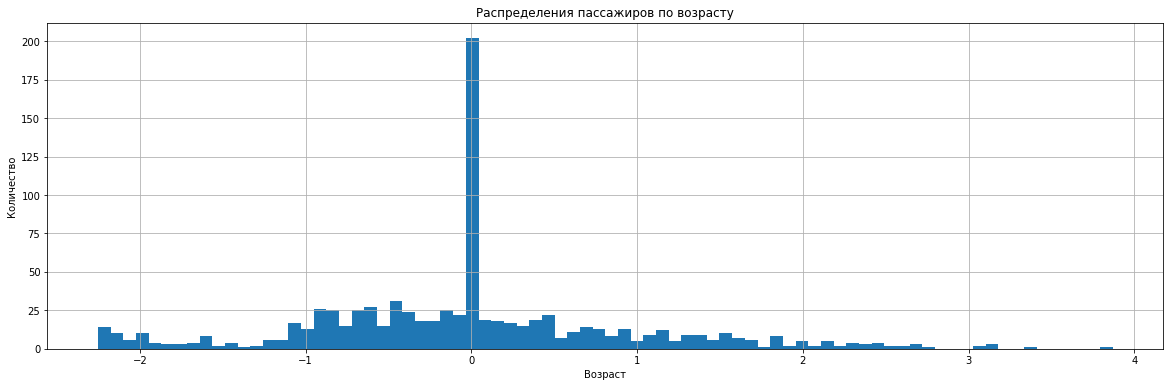

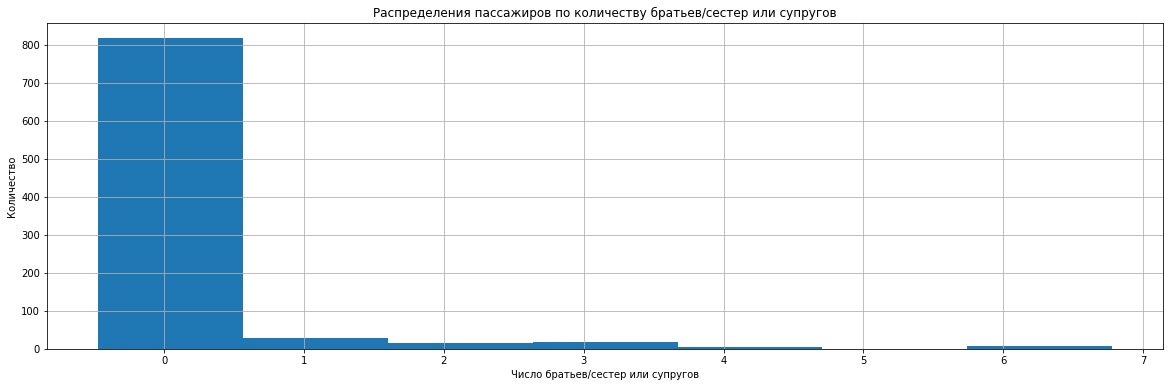

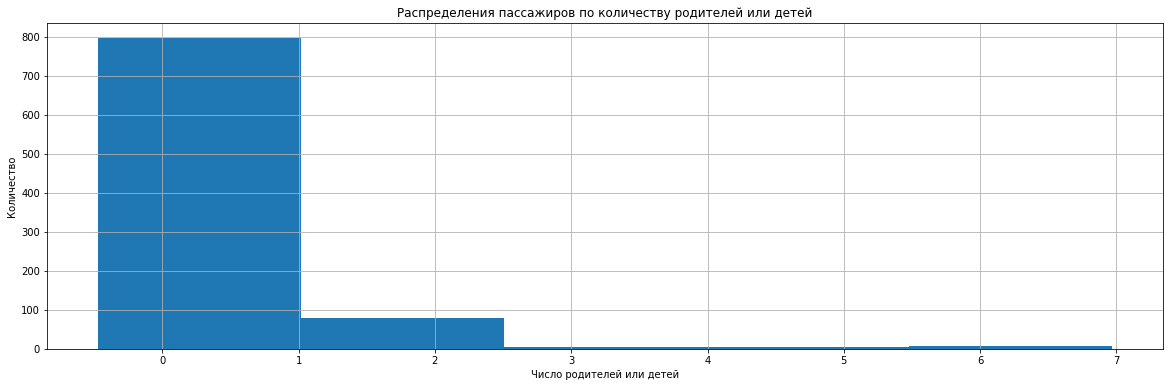

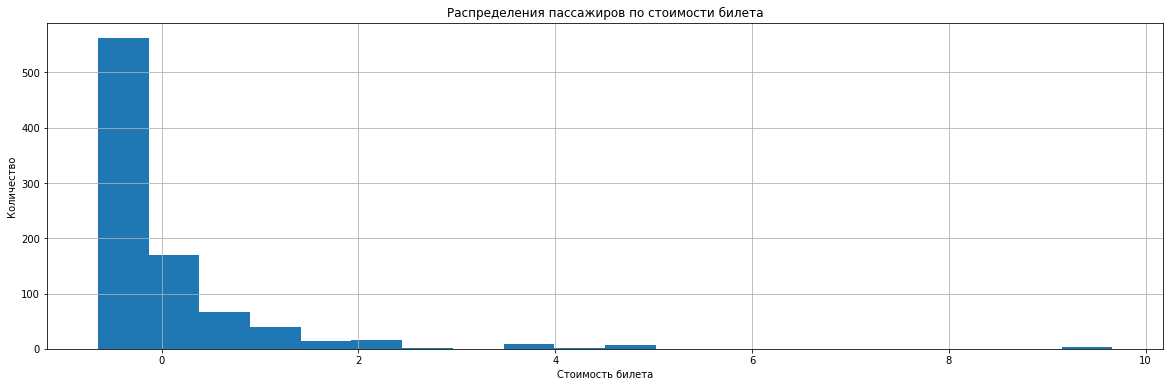

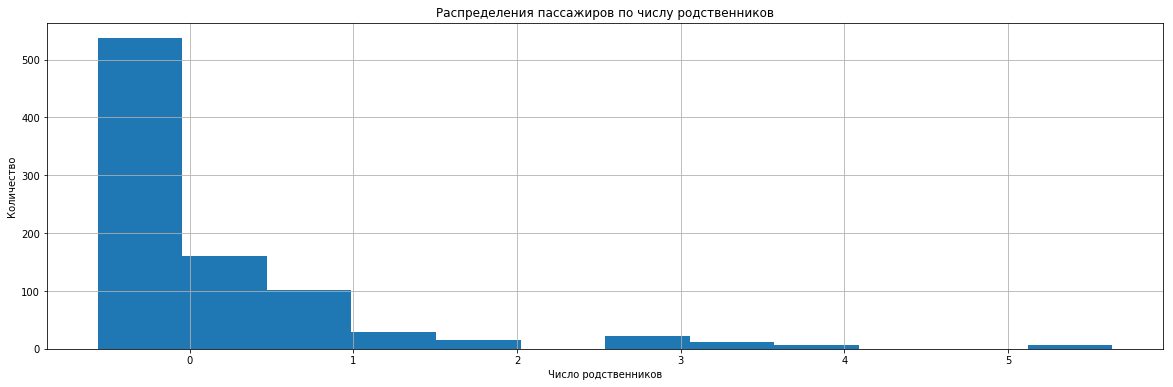

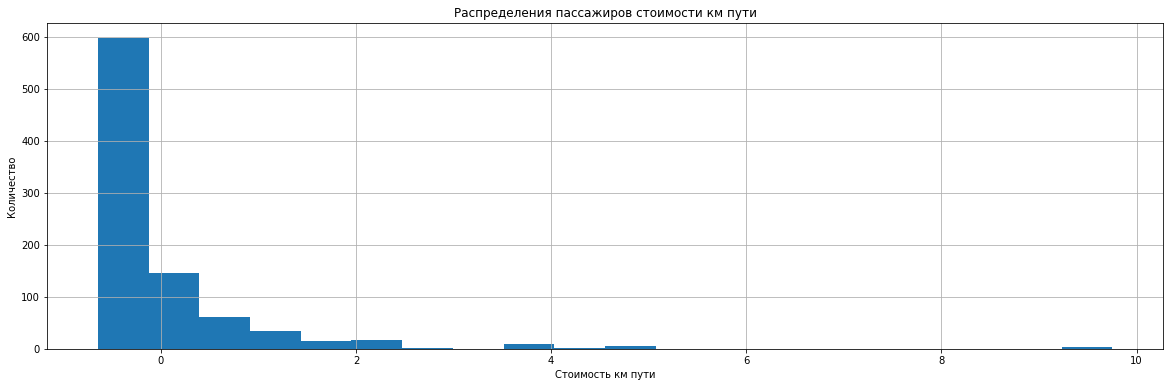

In [51]:
custom_hist(data["Age_norm"], 'Распределения пассажиров по возрасту', 'Возраст', bins=80)
custom_hist(data["SibSp_norm"], 'Распределения пассажиров по количеству братьев/сестер или супругов', 'Число братьев/сестер или супругов', bins=7)
custom_hist(data["Parch_norm"], 'Распределения пассажиров по количеству родителей или детей', 'Число родителей или детей', bins=5)
custom_hist(data["Fare_norm"], 'Распределения пассажиров по стоимости билета', 'Стоимость билета', bins=20)
custom_hist(data["Relatives_norm"], 'Распределения пассажиров по числу родственников', 'Число родственников', bins=12)
custom_hist(data["PricePerKm_norm"], 'Распределения пассажиров стоимости км пути', 'Стоимость км пути', bins=20)

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [52]:
data.loc[data["Sex"] == "male", "Sex"] = 0
data.loc[data["Sex"] == "female", "Sex"] = 1

data.loc[data["Embarked"] == "S", "Embarked"] = 0
data.loc[data["Embarked"] == "C", "Embarked"] = 1
data.loc[data["Embarked"] == "Q", "Embarked"] = 2

data['Cabin']=pd.factorize(data['Cabin'])[0]
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Relatives,PricePerKm,Age_norm,SibSp_norm,Parch_norm,Fare_norm,Relatives_norm,PricePerKm_norm
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,0,2,0.001236,-0.592148,0.432550,-0.473408,-0.502163,0.059127,-0.502707
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,1,2,0.012462,0.638430,0.432550,-0.473408,0.786404,0.059127,0.800605
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,0,1,0.001351,-0.284503,-0.474279,-0.473408,-0.488580,-0.560660,-0.489351
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2,0,2,0.009051,0.407697,0.432550,-0.473408,0.420494,0.059127,0.404552
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,0,1,0.001372,0.407697,-0.474279,-0.473408,-0.486064,-0.560660,-0.486877


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null int64
Age                891 non-null float64
SibSp              891 non-null int64
Parch              891 non-null int64
Fare               891 non-null float64
Cabin              891 non-null int64
Embarked           891 non-null int64
Relatives          891 non-null int64
PricePerKm         891 non-null float64
Age_norm           891 non-null float64
SibSp_norm         891 non-null float64
Parch_norm         891 non-null float64
Fare_norm          891 non-null float64
Relatives_norm     891 non-null float64
PricePerKm_norm    891 non-null float64
dtypes: float64(9), int64(8), object(1)
memory usage: 125.4+ KB
